## Exploration & Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datassist import explore
from datassist import graph

In [2]:
df_titanic = pd.read_csv('data/train.csv')

In [3]:
df_titanic = df_titanic.set_index('PassengerId')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.shape

(891, 11)

In [5]:
explore.overview(df_titanic)

,NULL Count,NULL %,Unique Items,Type
Survived,0,0.0,2,int64
Pclass,0,0.0,3,int64
Name,0,0.0,891,object
Sex,0,0.0,2,object
Age,177,19.9,88,float64
SibSp,0,0.0,7,int64
Parch,0,0.0,7,int64
Ticket,0,0.0,681,object
Fare,0,0.0,248,float64
Cabin,687,77.1,147,object


In [6]:
explore.basic_stats(df_titanic)

,Pclass,Age,SibSp,Parch,Fare
count,891.0,714.0,891.0,891.0,891.0
mean,2.3,29.7,0.5,0.4,32.2
std,0.8,14.5,1.1,0.8,49.7
min,1.0,0.4,0.0,0.0,0.0
25%,2.0,20.1,0.0,0.0,7.9
50%,3.0,28.0,0.0,0.0,14.5
75%,3.0,38.0,1.0,0.0,31.0
max,3.0,80.0,8.0,6.0,512.3
median,3.0,28.0,0.0,0.0,14.5
mode,3.0,24.0,0.0,0.0,8.0


In [7]:
explore.count_outliers(df_titanic)

,index,Number of Outliers
0,Survived,0
1,Pclass,0
2,Age,2
3,SibSp,30
4,Parch,15
5,Fare,20


Some outliers in age, SibSp, ParCh and Fare to look out for in graphs below

<Axes: xlabel='Age', ylabel='Count'>

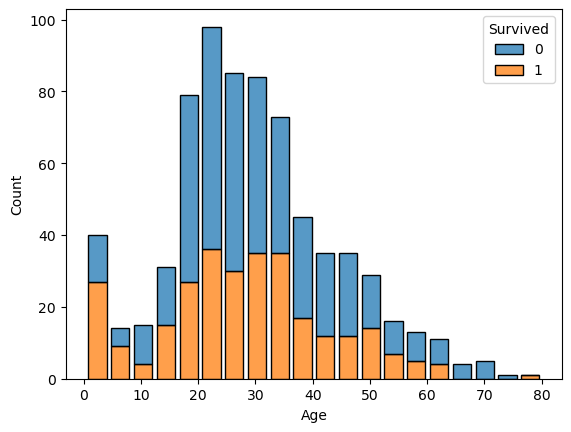

In [8]:
graph.plot_histogram_by_category(df_titanic, 'Age', 'Survived')

<Axes: xlabel='Fare', ylabel='Count'>

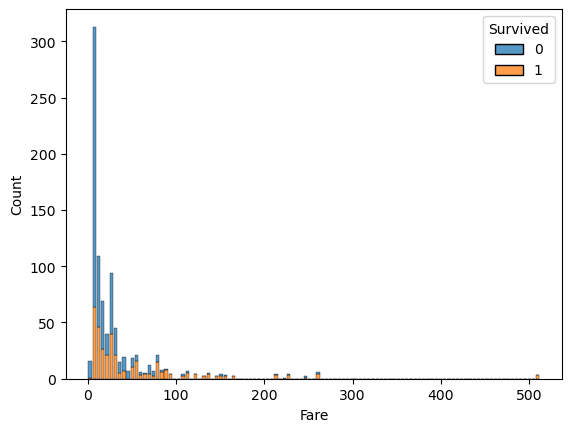

In [9]:
graph.plot_histogram_by_category(df_titanic, 'Fare', 'Survived')

The data here are highly skewed towards the lower end of the range. The mode is £8 which is likely within the tallest bin.

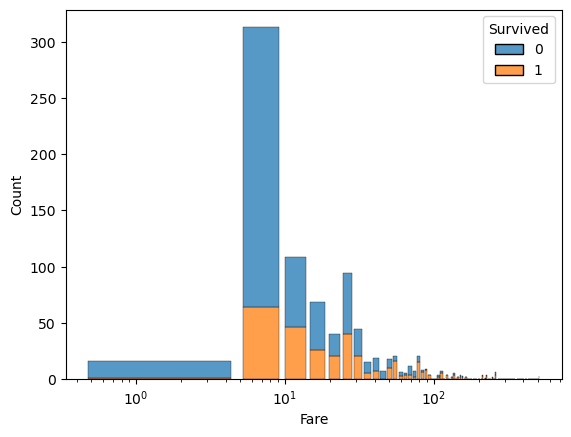

In [10]:
graph.plot_histogram_by_category(
    df_titanic, 'Fare', 'Survived'
).set_xscale('log')

Plotting the Fare again but with a logarithmic scale shows that most of the tickets are in the £5-£9 range

<Axes: title={'center': 'Survivors by Number of Siblings/ Spouses Aboard'}, xlabel='SibSp', ylabel='Count'>

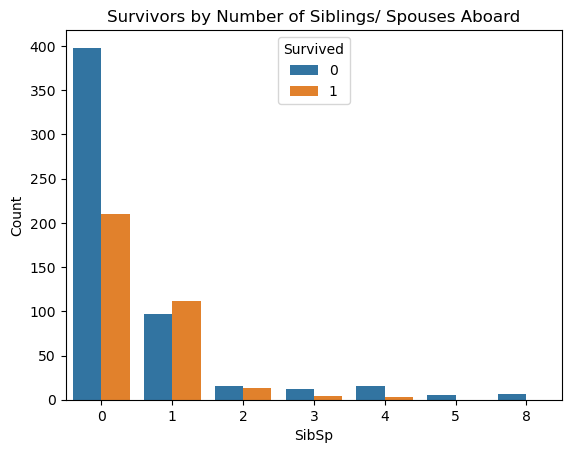

In [11]:
graph.plot_bar_by_category(
    df_titanic, 'SibSp', 'Survived',
    'Survivors by Number of Siblings/ Spouses Aboard'
)

<Axes: title={'center': 'Survivors by Ticket Class'}, xlabel='Pclass', ylabel='Count'>

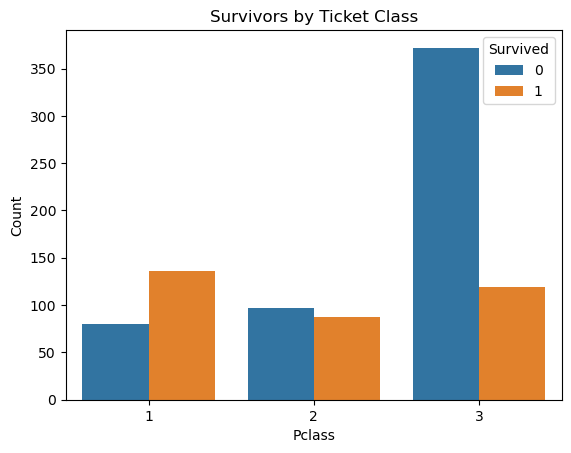

In [12]:
graph.plot_bar_by_category(
    df_titanic, 'Pclass', 'Survived', 'Survivors by Ticket Class'
)

Most of the tickets appear to be 3<sup>rd</sup> class. Within this group about 3x the number of people died compared to survived. The overwhelming majority of deaths are 3<sup>rd</sup> class ticket holders.

This may be due to the fact that they were housed below the waterline, many did not speak English so may not have understood warnings to abandon ship and preferential treatment was likely given to the 1<sup>st</sup> and 2<sup>nd</sup> class passengers.

<Axes: title={'center': 'Survivors by Number of Parents / Children Aboard'}, xlabel='Parch', ylabel='Count'>

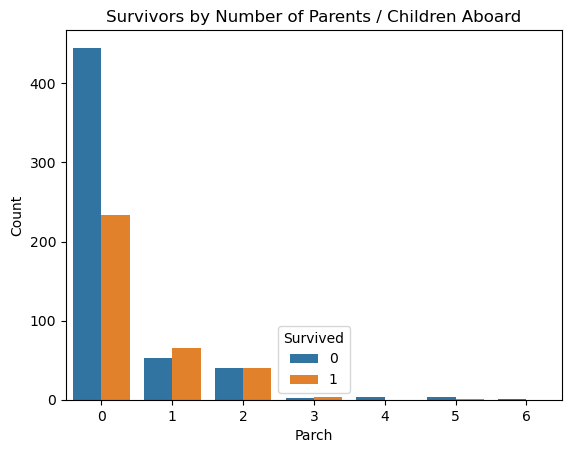

In [13]:
graph.plot_bar_by_category(
    df_titanic, 'Parch', 'Survived',
    'Survivors by Number of Parents / Children Aboard'
)

The number of people from each category decreases as the ParCh value increases. Those with no parents or children aboard are twice as likely to die as survive. This is proportionally greater than any other class, each of which seems to have about a 50/50 chance of survival.

This makes sense assuming women and children were allowed onto lifeboats first.

<Axes: title={'center': 'Survivors by Sex'}, xlabel='Sex', ylabel='Count'>

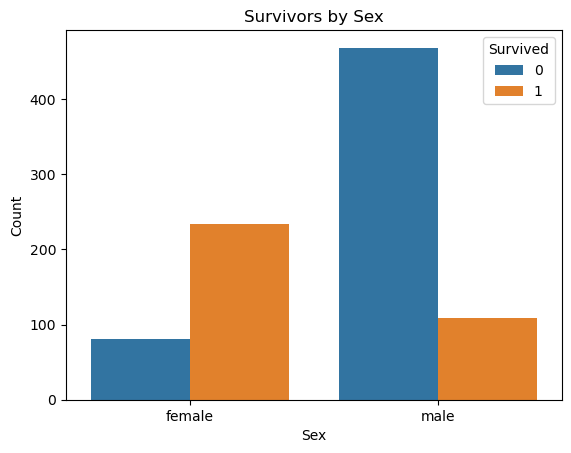

In [14]:
graph.plot_bar_by_category(
    df_titanic, 'Sex', 'Survived', 'Survivors by Sex'
)

A higher proportion of women survived than men.

[[Text(0, 0, 'Cherbourg'),
  Text(1, 0, 'Queenstown'),
  Text(2, 0, 'Southampton')]]

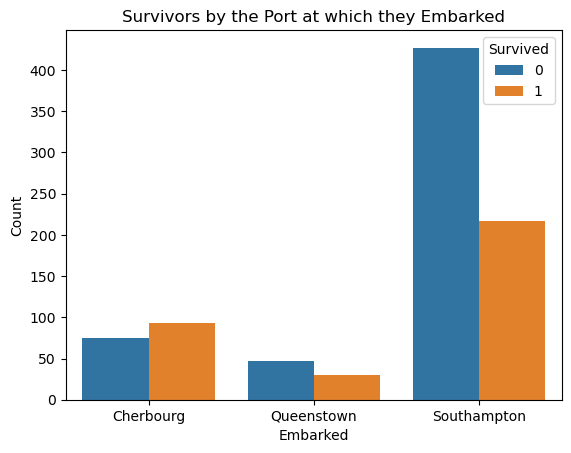

In [15]:
# C = Cherbourg, Q = Queenstown, S = Southampton
graph.plot_bar_by_category(
    df_titanic, 'Embarked', 'Survived',
    'Survivors by the Port at which they Embarked'
).set(xticklabels=['Cherbourg', 'Queenstown', 'Southampton'])


Someone was more likely to survive if they embarked at Southampton or Queenstown.

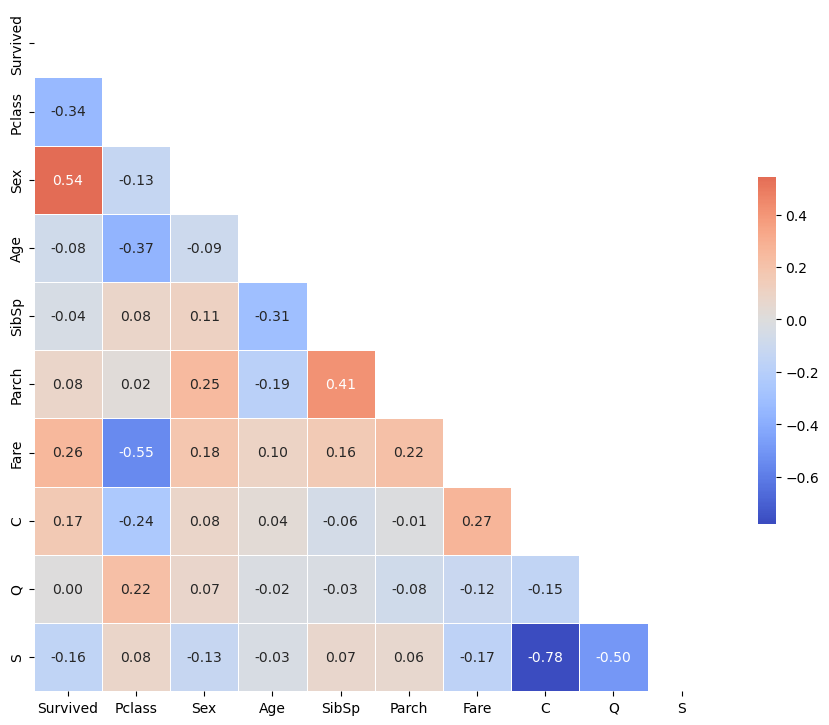

In [16]:
# Add check to make sure 'Sex' is only converted once, 
# and that `ohe` is not concatenated to `df_titanic`
# each time the cell is run.
if not any((
    df_titanic['Sex'].dtype == np.int64,
    'C' in df_titanic.columns,
    'Q' in df_titanic.columns,
    'S' in df_titanic.columns,
)):
    df_titanic['Sex'] = df_titanic['Sex'].map({'male':0, 'female':1})
    ohe = pd.get_dummies(df_titanic['Embarked']).astype(int)
    df_titanic = pd.concat([df_titanic, ohe], axis=1)
graph.plot_correlation_matrix(df_titanic)


The 'Survived' column shows that sex is the best indicator of how likely a passenger is to survive. This is followed by ticket class and then fare, the former having a negative correlation and the latter a positive one.

I'm not sure how meaningful the correlations between the categorical columns (Sex, S, Q, P) and Survived are. See below...

Text(0.5, 1.0, 'Sex vs Survived')

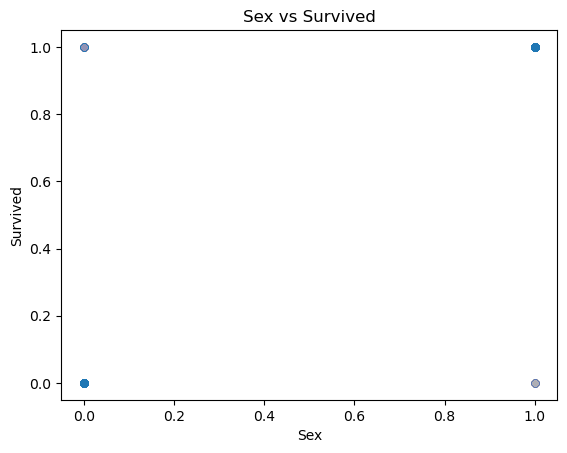

In [17]:
# Plot Sex vs Survived to see how well they correlate
plt.scatter(df_titanic['Sex'], df_titanic['Survived'], alpha=0.005)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Sex vs Survived')

This graph is ridiculous. However, by making the alpha incredibly small, it shows essentially what the bar graph above shows but in a less readable manner: women were more likely to survive, men were more likely to die.

In [18]:
# return the dataframe to its original state
if all((
    df_titanic['Sex'].dtype == np.int64,
    'C' in df_titanic.columns,
    'Q' in df_titanic.columns,
    'S' in df_titanic.columns,
)):
    df_titanic['Sex'] = df_titanic['Sex'].map({0: 'male', 1: 'female'})
    df_titanic = df_titanic.drop(columns=['C', 'Q', 'S'])
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Scaling

In [19]:
# import transformers to scale input features
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import (
    PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler
)

In [20]:
class DoNothingTransformer(BaseEstimator, TransformerMixin):
    """Performs no transformation of the original 
    data, but returns it as numpy array."""

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None) -> np.array:
        return X.to_numpy()

In [61]:
RANDOM_STATE = 42

scalers = {
    'Original Data': DoNothingTransformer(),
    'Robust': RobustScaler(quantile_range=(25, 75)),
    'Power': PowerTransformer(method='yeo-johnson'),
    'Quantile (Gaussian)': QuantileTransformer(
        output_distribution='normal',
        random_state=RANDOM_STATE,
        n_quantiles=df_titanic.shape[0]
    ),
    'Standard': StandardScaler(),
}

columns = df_titanic.select_dtypes(include='number').columns.drop('Survived')
columns = ['Age', 'Fare']

scaled_features = []
for scaler in scalers.values():
    scaled_features.append(
        scaler.fit_transform(
            df_titanic.loc[:, columns]
        )
    )

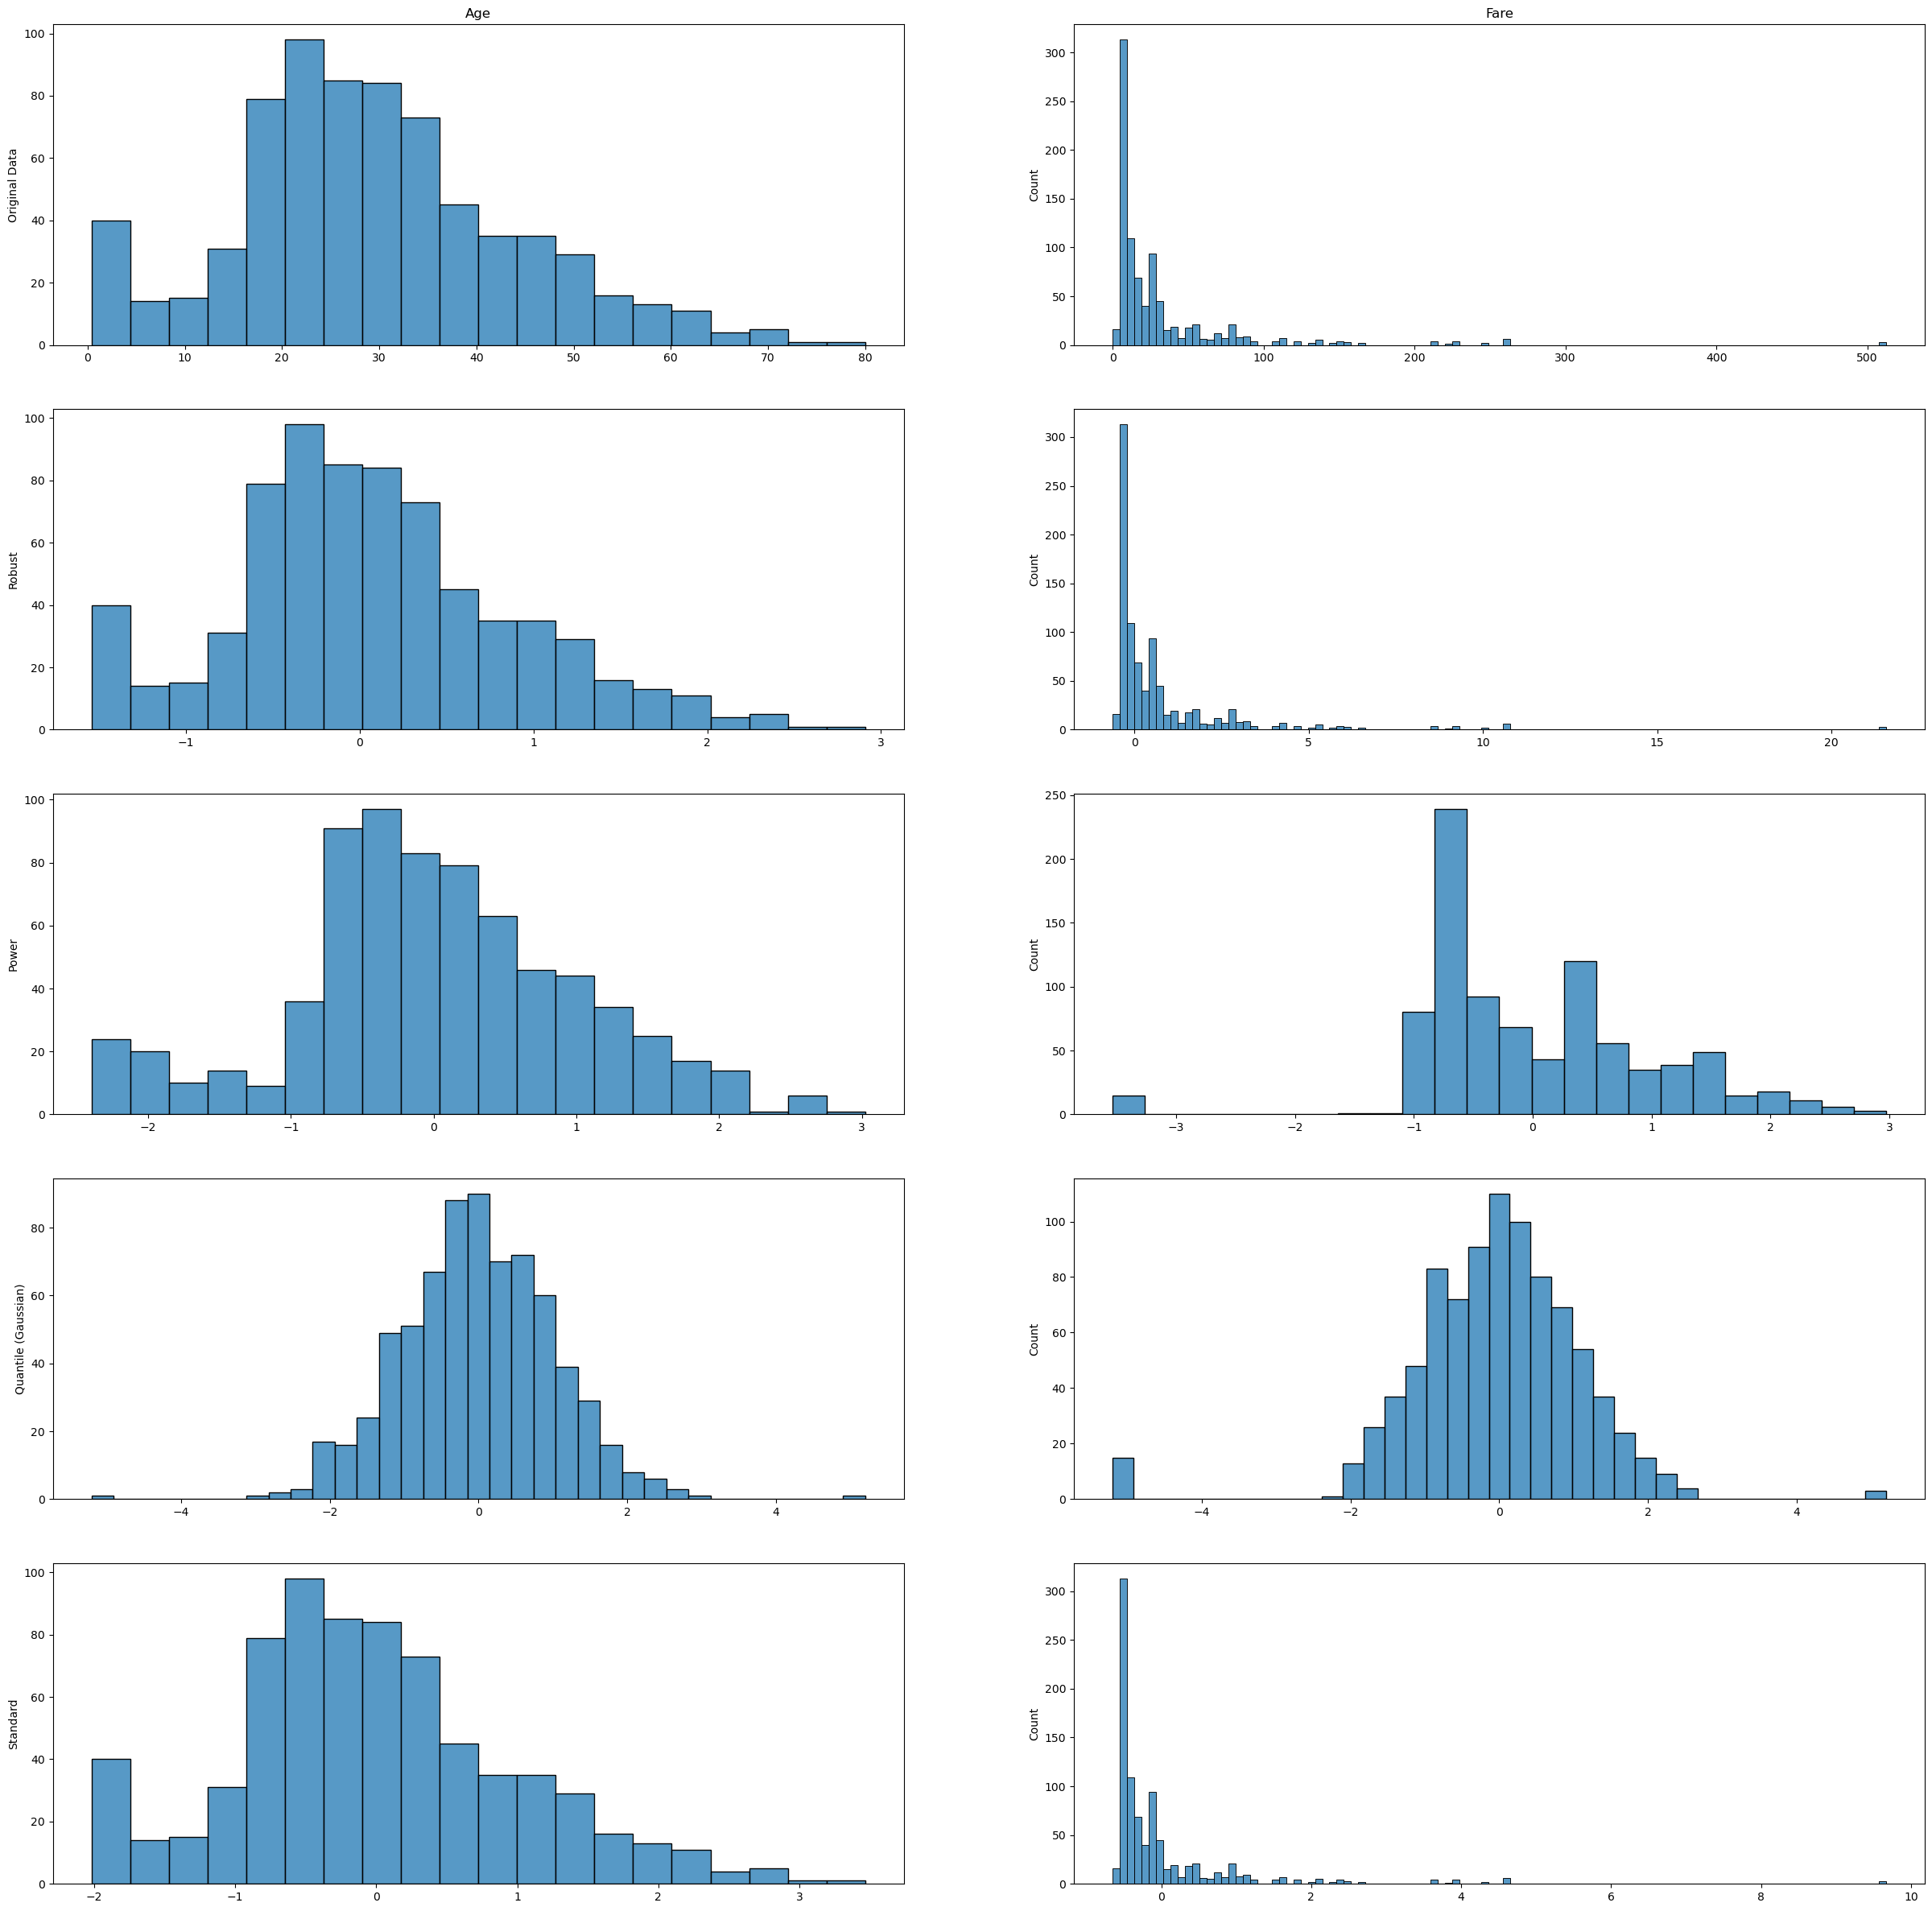

In [62]:
num_rows = len(scalers)
num_cols = len(columns)

fig, axs = plt.subplots(num_rows, num_cols)
fig.set_figwidth(30)
fig.set_figheight(30)

for r, scaler in enumerate(scalers.keys()):
    axs[r, 0].set_ylabel(scaler)

for c, title in enumerate(columns):
    axs[0, c].set_title(title)

for i, ax in enumerate(axs.flatten()):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(scaled_features[row][:, col], ax=ax)

The graphs show that:
1. Pclass
   1. Quantile Transformer centers the class to a mean of 0, but range is -5 to 5.
   2. RobustScaler scales the values such that they are all negative. Which may not be good.
   3. The other two scalers scale from about -1.5 to 1 with a mean around -0.5.
2. Age
   1. Age is somewhat binomially distributed (with peaks at ages < 5 and early 20s) so the QuantileTransformer produces a nice normal distribution
   2. The other scalers do remove the bias (set mean to 0) with a range of -2 to 3, without really changing the shape of the distribution
3. SibSp & ParCh
   1. It doesn't look like any of the transformers scale either of these feature in a useful way - more investigation needed
4. Fare
   1. Quantile transformer appears best for this.

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scalers = {
    'Original Data': DoNothingTransformer(),
    'Power': PowerTransformer(method='yeo-johnson'),
    'Quantile (Gaussian)': QuantileTransformer(
        output_distribution='normal',
        random_state=RANDOM_STATE,
        n_quantiles=df_titanic.shape[0]
    ),
}

columns = df_titanic.loc[:, ['SibSp', 'Parch']].columns

scaled_features = []
for scaler in scalers.values():
    scaled_features.append(
        scaler.fit_transform(
            df_titanic.loc[:, columns]
        )
    )

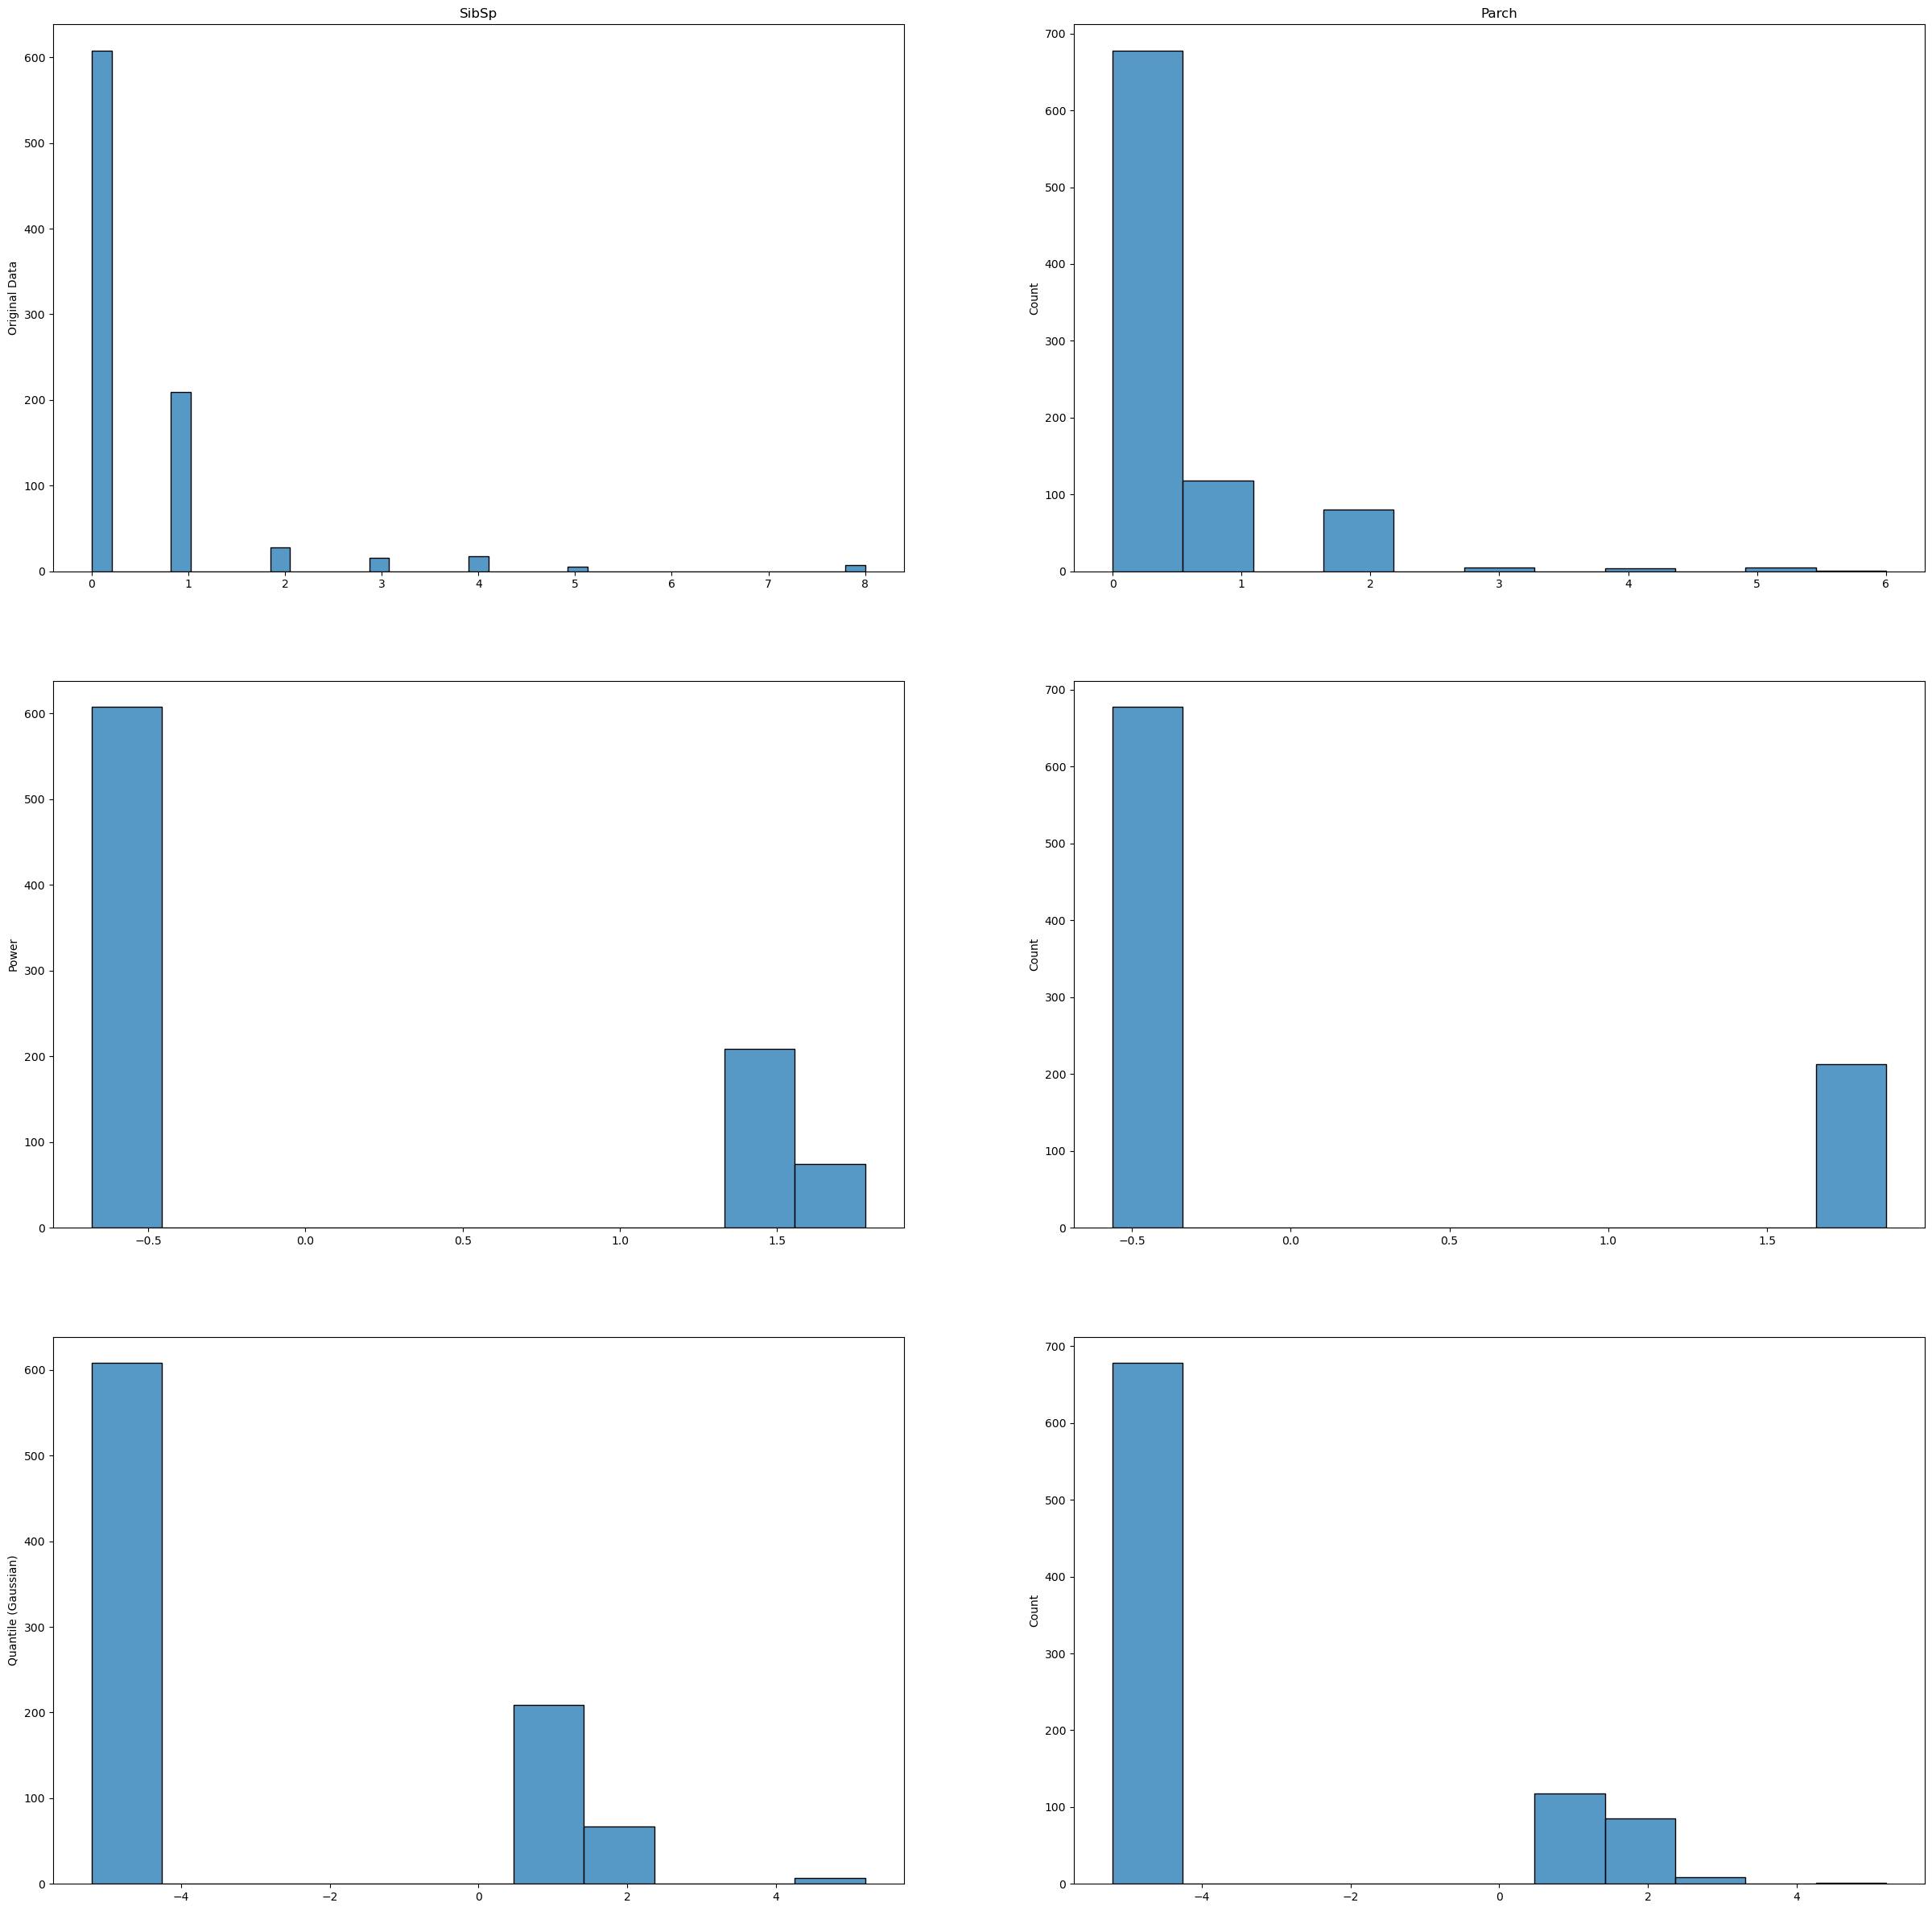

In [55]:
num_rows = len(scalers)
num_cols = len(columns)

fig, axs = plt.subplots(num_rows, num_cols)
fig.set_figwidth(30)
fig.set_figheight(30)

for r, scaler in enumerate(scalers.keys()):
    axs[r, 0].set_ylabel(scaler)

for c, title in enumerate(columns):
    axs[0, c].set_title(title)

for i, ax in enumerate(axs.flatten()):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(scaled_features[row][:, col], ax=ax)

## Other things, out of interest...

How many survived vs died?

In [25]:
explore.count_group(df_titanic, ['Survived'])

,Survived,Count
0,0,549
1,1,342


What is a good baseline for the accuracy of the model? If it always guessed that the passenger died (i.e. Survived = 0), then the accuracy would be:

In [26]:
print(f'Min acceptable accuracy: {(549 / 891):.3f}')

Min acceptable accuracy: 0.616


How much do passengers pay for their tickets?

<Axes: xlabel='Pclass', ylabel='Fare'>

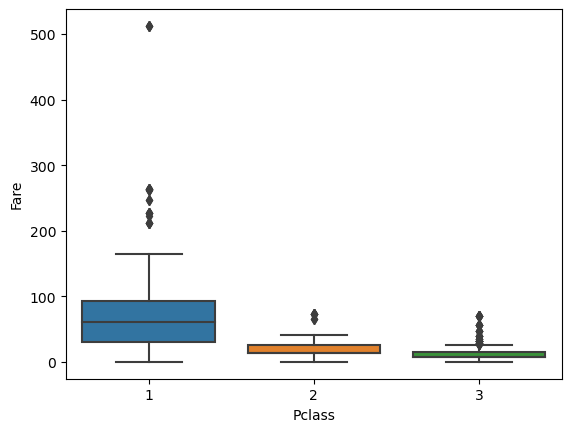

In [27]:
sns.boxplot(df_titanic, x='Pclass', y='Fare')

It seems that some in 1<sup>st</sup> class got a really good deal, while those in 3<sup>rd</sup> class are paying as much as those in 2<sup>nd</sup>!

## Investigating the cabin feature

It's a shame that most of the values are missing. But there is a pattern here

In [28]:
df_titanic['Cabin'].dropna().unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

There are clearly decks/ floors marked by the letters. Is there any connection between which floor a person is on and whether they survived?

In [29]:
def take_first_letter(row):
    """Check if cabin is null and return the first letter of cabin"""
    if pd.isnull(row):
        return 'Unknown'
    else:
        return row[0]

df_titanic['Deck'] = df_titanic['Cabin'].apply(take_first_letter)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Unknown
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Unknown
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Unknown


In [30]:
explore.count_group(df_titanic, ['Deck', 'Survived'])

,Deck,Survived,Count
0,A,0,8
1,A,1,7
2,B,0,12
3,B,1,35
4,C,0,24
5,C,1,35
6,D,0,8
7,D,1,25
8,E,0,8
9,E,1,24


There is a mysterious T in here. This may be an error.

<Axes: title={'center': 'Survivors by Deck'}, xlabel='Deck', ylabel='Count'>

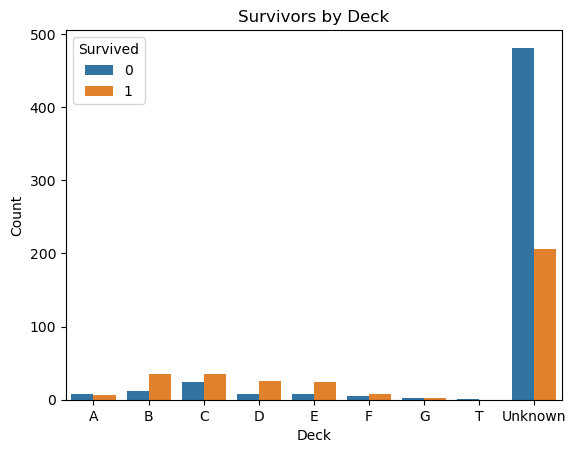

In [31]:
# Plot who survived by area
graph.plot_bar_by_category(
    df_titanic, 'Deck', 'Survived', 'Survivors by Deck'
)

<Axes: title={'center': 'Survivors by Deck'}, xlabel='Deck', ylabel='Count'>

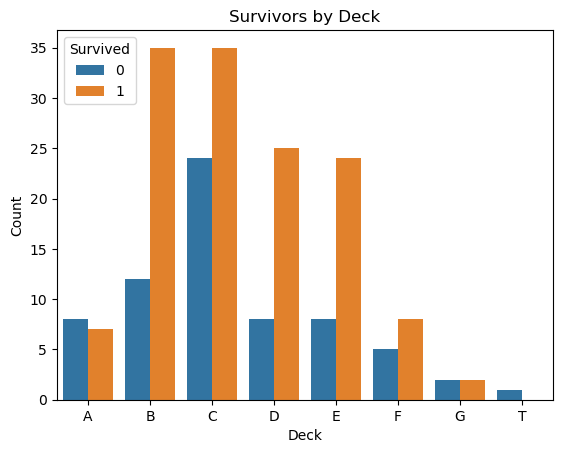

In [32]:
# Plot again but remove the Unknown category
graph.plot_bar_by_category(
    df_titanic.drop(df_titanic[df_titanic['Deck'] == 'Unknown'].index),
    'Deck', 'Survived', 'Survivors by Deck'
)

It's clear that if the area is known, then the liklihood of a person surviving is much greater than if not. Is this due to "survivorship bias" or is the data skewed?

In [33]:
area_class = explore.count_group(df_titanic, ['Deck', 'Pclass'])
area_class

,Deck,Pclass,Count
0,A,1,15
1,B,1,47
2,C,1,59
3,D,1,29
4,D,2,4
5,E,1,25
6,E,2,4
7,E,3,3
8,F,2,8
9,F,3,5


<Axes: title={'center': 'Deck by Ticket Class'}, xlabel='Deck', ylabel='Count'>

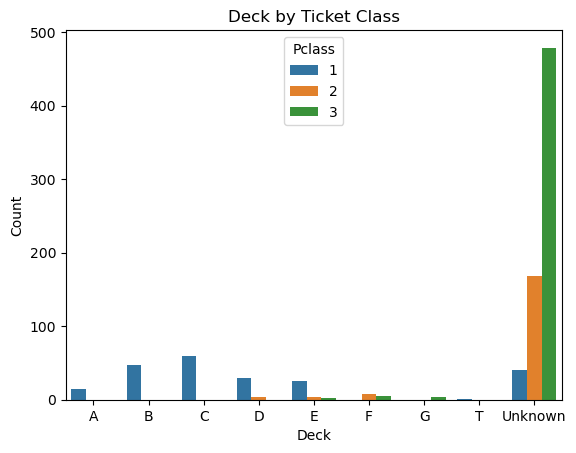

In [63]:
graph.plot_bar_by_category(df_titanic, 'Deck', 'Pclass', 'Deck by Ticket Class')

Floors A, B and C are only 1<sup>st</sup> class. While D is 1<sup>st</sup> and 2<sup>nd</sup> class. E is all three but from then on it is only 2<sup>nd</sup> and/ or 3<sup>rd</sup> class. However, since there area so many people staying on Unkown floors, we cannot say with certainty that these rules are strictly accurate.

Most of the Unkown category is 3<sup>rd</sup> class who are also the ones most likely to die.

The image below shows the labelled floors of the Titanic

(-0.5, 1400.5, 2087.5, -0.5)

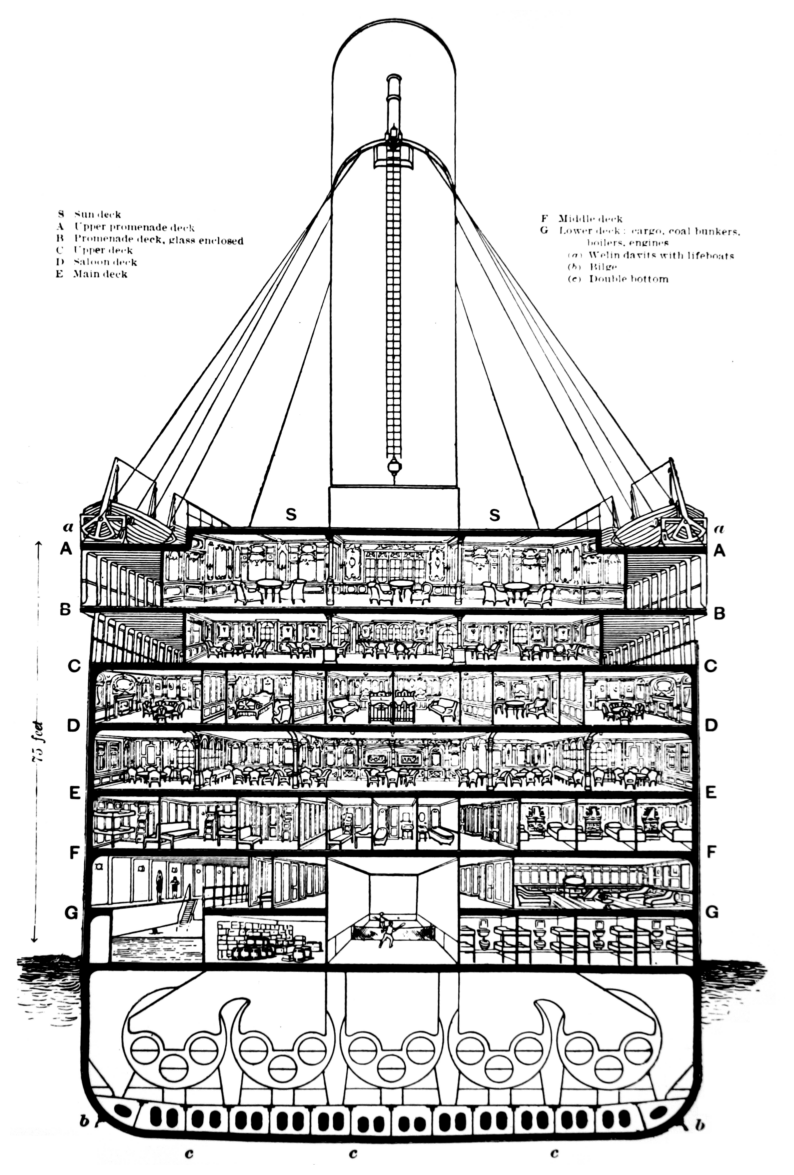

In [35]:
# show the floors of the Titanic (image from: https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic#/media/File:Olympic_&_Titanic_cutaway_diagram.png)
fig = plt.figure(figsize=(10,15))
im = plt.imread('img/Olympic_&_Titanic_cutaway_diagram.png')
plt.imshow(im)
plt.axis('off')

## If I had more time...


1. I would investigate the decks further: although I suspect that they are highly correlated with the ticket class, it would be interesting to try to impute the missing values (perhaps with a KNN imputer).

In [65]:
df_results = pd.DataFrame(
    {
        'F1 score': 
            {'Voting (SVC, GBC, RFC)': 0.764 ,'SVC': 0.764, 'Random Forest': 0.762},
    }
)

df_results

,F1 score
Random Forest,0.762
SVC,0.764
"Voting (SVC, GBC, RFC)",0.764


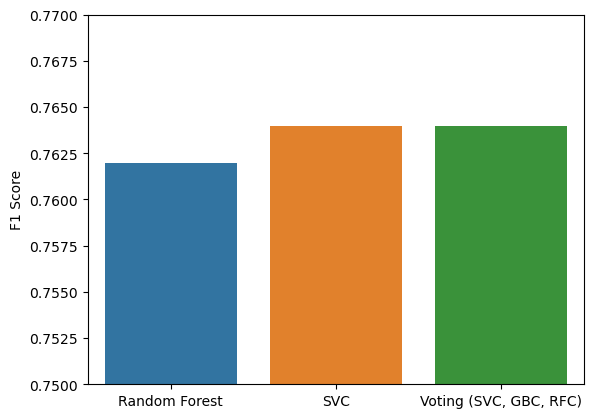

In [74]:
g = sns.barplot(df_results, x=df_results.index.ravel(), y=df_results.values.ravel())
# set y-axis range to 0.7-0.8
g.set_ylim(0.75, 0.77)
# set y label to 'F1 Score'
g.set_ylabel('F1 Score')
g.set_title('Best Estimators')
plt.show()

# Improvements
- Investigate ticket numbers
- Investigate fare prices more
- Generally, (if you have the time) investigate all features
- Remove outliers (was hesitant due to small dataset size)
- Recursive feature elimination! Wow!
- Use stratefied K folds in cross validation